## Stokes flow near a plane surface

In [1]:
## compile PyStokes for this notebook
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)

running install
running build
running build_py
running build_ext
running install_lib
running install_egg_info
Removing /Users/rsingh/software/anaconda/lib/python3.7/site-packages/pyforces-1.0.0-py3.7.egg-info
Writing /Users/rsingh/software/anaconda/lib/python3.7/site-packages/pyforces-1.0.0-py3.7.egg-info
running install
running build
running build_py
running build_ext
running install_lib
running install_egg_info
Removing /Users/rsingh/software/anaconda/lib/python3.7/site-packages/pylaplace-1.0.0-py3.7.egg-info
Writing /Users/rsingh/software/anaconda/lib/python3.7/site-packages/pylaplace-1.0.0-py3.7.egg-info
running install
running build
running build_py
running build_ext
running install_lib
running install_egg_info
Removing /Users/rsingh/software/anaconda/lib/python3.7/site-packages/pystokes-1.0.0-py3.7.egg-info
Writing /Users/rsingh/software/anaconda/lib/python3.7/site-packages/pystokes-1.0.0-py3.7.egg-info


In [2]:
%matplotlib inline
import pystokes, pyforces 
import numpy as np, matplotlib.pyplot as plt

In [3]:
# particle radius, fluid viscosity, and number of particles
b, eta, Np = 1.0, 1.0/6.0, 1

#initialise position, orientation and body force on the colloid
r, p, F = np.array([0.0, 0.0, 3.4]), np.array([0.0, 0.0, 1]),  np.array([0.0, 0.0, 1])

# irreducible coeffcients
V2s = pystokes.utils.irreducibleTensors(2, p)
V3t = pystokes.utils.irreducibleTensors(1, p)

In [4]:
 # space dimension , extent , discretization
dim, L, Ng = 3, 10, 128

#Instantiate the Flow class near a planw wall and interface
wFlow = pystokes.wallBounded.Flow(radius=b, particles=Np, viscosity=eta, gridpoints=Ng*Ng)
iFlow = pystokes.interface.Flow(radius=b, particles=Np, viscosity=eta, gridpoints=Ng*Ng)

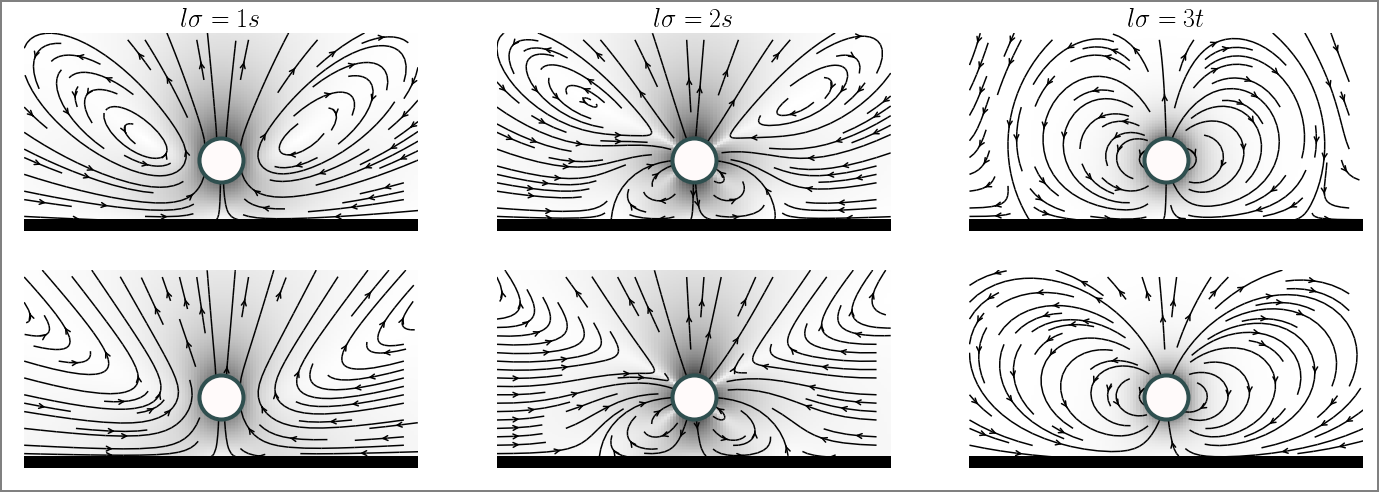

In [5]:
 plt.figure(figsize=(24, 8), edgecolor='gray', linewidth=4)

# create the grid
rr, vv = pystokes.utils.gridYZ(dim, L, Ng)

plt.subplot(231);  vv=vv*0; 
wFlow.flowField1s(vv, rr, r, F)  
pystokes.utils.plotStreamlinesYZsurf(vv, rr, r, ms=44,offset=1e-1, title='1s')

plt.subplot(232);   vv=vv*0; 
wFlow.flowField2s(vv, rr, r, V2s)  
pystokes.utils.plotStreamlinesYZsurf(vv, rr, r, ms=44, offset=1e-1, title='2s')

plt.subplot(233); vv=vv*0; 
wFlow.flowField3t(vv, rr, r, V3t)  
pystokes.utils.plotStreamlinesYZsurf(vv, rr, r, ms=44,offset=4e-2, title='3t')

plt.subplot(234);  vv=vv*0; 
iFlow.flowField1s(vv, rr, r, F)  
pystokes.utils.plotStreamlinesYZsurf(vv, rr, r, ms=44,offset=4e-1, title='None')

plt.subplot(235);   vv=vv*0; 
iFlow.flowField2s(vv, rr, r, V2s)  
pystokes.utils.plotStreamlinesYZsurf(vv, rr, r, ms=44,offset=1e-1, title='None')

plt.subplot(236); vv=vv*0; 
iFlow.flowField3t(vv, rr, r, V3t)  
pystokes.utils.plotStreamlinesYZsurf(vv, rr, r, ms=44,offset=6e-2, title='None')